In [351]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 


# Uppgift 0 - uppvärmning med riket
### I den här uppgiften ska du visualisera med hjälp av matplotlib och/eller seaborn
- a) Börja med att läsa in filen riket2023_åk9_np.xlsx och sheets för de olika ämnena. Ändra kolumnnamnen på
respektive dataframe så du får något liknande som nedan

In [352]:
df_subjects = pd.read_excel("../data/labb_2/riket2023_åk9_np.xlsx", skiprows=8, sheet_name= [0,1,2,3])

df_svenska_andraspråk = pd.read_excel("../data/labb_2/riket2023_åk9_np.xlsx", skiprows=8, sheet_name= 3) # Imports the math sheet excel file  and skips 8 rows


df_svenska = pd.read_excel("../data/labb_2/riket2023_åk9_np.xlsx", skiprows=8, sheet_name= 2) # Imports the math sheet excel file  and skips 8 rows


df_engelska = pd.read_excel("../data/labb_2/riket2023_åk9_np.xlsx", skiprows=8, sheet_name= 0) # Imports the math sheet excel file  and skips 8 rows


df_matematik = pd.read_excel("../data/labb_2/riket2023_åk9_np.xlsx", skiprows=8, sheet_name= 1) # Imports the math sheet excel file  and skips 8 rows
df_matematik

,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [353]:
df_matematik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Riket            4 non-null      object 
 1   Typ av huvudman  4 non-null      object 
 2   Totalt           4 non-null      int64  
 3   Flickor          4 non-null      int64  
 4   Pojkar           4 non-null      int64  
 5   Totalt           4 non-null      object 
 6   Flickor          4 non-null      object 
 7   Pojkar           4 non-null      object 
 8   Totalt           4 non-null      float64
 9   Flickor          4 non-null      float64
 10  Pojkar           4 non-null      float64
dtypes: float64(3), int64(3), object(5)
memory usage: 484.0+ bytes


In [354]:
df_matematik.columns = [1,2,3,4,5,6,7,8,9,10,11]  # Ändrar kolumnerna till siffror pga multiple titles
df_matematik.head()

,1,2,3,4,5,6,7,8,9,10,11
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [355]:
df_matematik.columns = ["Riket", "Huvudman", "Totalt (A-F)", "Flickor (A-F)", "Pojkar (A-F)", "Totalt (A-E)", "Flickor (A-E)", "Pojkar (A-E)", "Totalt (Poäng)", "Flickor (Poäng)", "Pojkar (Poäng)"]
df_matematik

,Riket,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (Poäng),Flickor (Poäng),Pojkar (Poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [356]:
df_matematik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Riket            4 non-null      object 
 1   Huvudman         4 non-null      object 
 2   Totalt (A-F)     4 non-null      int64  
 3   Flickor (A-F)    4 non-null      int64  
 4   Pojkar (A-F)     4 non-null      int64  
 5   Totalt (A-E)     4 non-null      object 
 6   Flickor (A-E)    4 non-null      object 
 7   Pojkar (A-E)     4 non-null      object 
 8   Totalt (Poäng)   4 non-null      float64
 9   Flickor (Poäng)  4 non-null      float64
 10  Pojkar (Poäng)   4 non-null      float64
dtypes: float64(3), int64(3), object(5)
memory usage: 484.0+ bytes


### b) Ta reda på antalet som fått F i matematik totalt, pojkar respektive flickor.

In [357]:
total_number_girls = 51548 
total_number_boys = 55218


percentage_f_grade = 11.3/100
boys_percentage_f_grade = 11.5/100  # gör om till decimal

girls_with_f_grade = round(total_number_girls*percentage_f_grade) #beräknar mängden tjejer som fick f
boys_with_f_grade = round(total_number_boys*boys_percentage_f_grade) #beräknar mängden killar som fick f

print("Total numbers of boys who recieved an F in mathematics at year 9 is:", girls_with_f_grade)
print("Total numbers of boys who recieved an F in mathematics at year 9 is:", boys_with_f_grade)

Total numbers of boys who recieved an F in mathematics at year 9 is: 5825
Total numbers of boys who recieved an F in mathematics at year 9 is: 6350


### c) Rita ett stapeldiagram på totala poängen för de olika ämnena

In [358]:
df_subjects

{0:    Riket Typ av huvudman  Totalt  Flickor  Pojkar  Totalt   Flickor   Pojkar   \
 0  Riket        Samtliga  106941    51864   55077     97.0      97.1     97.0   
 1  Riket        Kommunal   84310    40675   43635     96.6      96.6     96.6   
 2  Riket         Enskild   22582    11165   11417     98.7      98.8     98.7   
 3  Riket      Skolverket      49       24      25    100.0     100.0    100.0   
 
    Totalt    Flickor    Pojkar    
 0      15.7       15.8      15.7  
 1      15.4       15.5      15.4  
 2      16.9       17.0      16.8  
 3      18.5       18.9      18.2  ,
 1:    Riket Typ av huvudman  Totalt  Flickor  Pojkar Totalt  Flickor  Pojkar   \
 0  Riket        Samtliga  106766    51548   55218    89.1     88.7    89.5   
 1  Riket        Kommunal   84163    40386   43777    88.1     87.7    88.5   
 2  Riket         Enskild   22553    11137   11416    92.9     92.2    93.5   
 3  Riket      Skolverket      50       25      25    ~100     ~100    ~100   
 
    

In [359]:

for key in df_subjects:
    df_subjects[key].columns = [
         "Riket",
         "Huvudman",
         "Totalt (A-F)",
         "Flickor (A-F)",
         "Pojkar (A-F)",
         "Totalt (A-E)",
         "Flickor (A-E)",
         "Pojkar (A-E)",
         "Totalt (Poäng)",
         "Flickor (Poäng)",
         "Pojkar (Poäng)",
    ]
   

df_subjects[1].head()




,Riket,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (Poäng),Flickor (Poäng),Pojkar (Poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [360]:
df_subjects[1]["Totalt (Poäng)"][0] # samtliga. gör detta för alla. lägg i lista.. plota listan 

11.9

In [361]:
df_subjects

{0:    Riket    Huvudman  Totalt (A-F)  Flickor (A-F)  Pojkar (A-F)  Totalt (A-E)  \
 0  Riket    Samtliga        106941          51864         55077          97.0   
 1  Riket    Kommunal         84310          40675         43635          96.6   
 2  Riket     Enskild         22582          11165         11417          98.7   
 3  Riket  Skolverket            49             24            25         100.0   
 
    Flickor (A-E)  Pojkar (A-E)  Totalt (Poäng)  Flickor (Poäng)  \
 0           97.1          97.0            15.7             15.8   
 1           96.6          96.6            15.4             15.5   
 2           98.8          98.7            16.9             17.0   
 3          100.0         100.0            18.5             18.9   
 
    Pojkar (Poäng)  
 0            15.7  
 1            15.4  
 2            16.8  
 3            18.2  ,
 1:    Riket    Huvudman  Totalt (A-F)  Flickor (A-F)  Pojkar (A-F) Totalt (A-E)  \
 0  Riket    Samtliga        106766          51548   

In [362]:
key

3

In [363]:
for key in df_subjects:
    print(df_subjects[key]["Totalt (Poäng)"][0]) 


15.7
11.9
13.6
9.4


In [364]:
total_point= [df_subjects[key]["Totalt (Poäng)"][0] for key in df_subjects] #list comprehenssion
total_point

[15.7, 11.9, 13.6, 9.4]

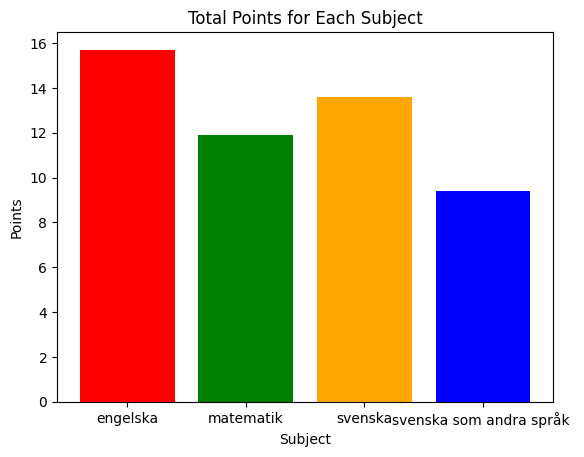

In [365]:
colors = ["red", "green", "orange", "blue"] # sätterfärger på pelarna
subject_names = ["engelska", "matematik", "svenska", "svenska som andra språk "] #försök till att sätta rätt ämne till pelaren 
# pd.Series(total_point).plot(kind="bar", x="", y="", xlabel= "subject", ylabel="Points", color=colors)
plt.bar(subject_names, total_point, color=colors,)
plt.xlabel("Subject")
plt.ylabel("Points")
plt.title("Total Points for Each Subject")
plt.show()

In [366]:
df_subjects[2]

,Riket,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (Poäng),Flickor (Poäng),Pojkar (Poäng)
0,Riket,Samtliga,93225,45800,47425,96.1,97.9,94.4,13.6,14.5,12.7
1,Riket,Kommunal,72771,35484,37287,95.7,97.6,93.8,13.3,14.3,12.4
2,Riket,Enskild,20414,10297,10117,97.6,98.7,96.6,14.4,15.2,13.5
3,Riket,Skolverket,40,19,21,100.0,100.0,100.0,15.0,15.9,14.2


### Tar ut Df 1 by 1 total poäng för kolumnerna samtliga, kommunal, enskild & skolverket

# Samtliga


In [367]:

total_poäng = [

]
total_point = df_subjects[i][df_subjects[i]["Huvudman"] == "Samtliga"]["Totalt (Poäng)"].values[0] #mask 
total_poäng.append(total_point)
total_poäng

[9.4]

# samtliga

In [368]:
total_poäng_0 = [

]
for i in range(4):
    total_point = df_subjects[i][df_subjects[i]["Huvudman"] == "Samtliga"]["Totalt (Poäng)"].values[0] # boolean mask 
    total_poäng_0.append(total_point)
    print(total_poäng_0)
    

[15.7]
[15.7, 11.9]
[15.7, 11.9, 13.6]
[15.7, 11.9, 13.6, 9.4]


# kommunal

In [369]:
total_poäng_1 = [
    
]

for i in range (4):
    total_point = df_subjects[i][df_subjects[i]["Huvudman"]== "Kommunal"]["Totalt (Poäng)"].values[0]
    total_poäng_1.append(total_point)
    print(total_poäng_1)

[15.4]
[15.4, 11.6]
[15.4, 11.6, 13.3]
[15.4, 11.6, 13.3, 9]


# enskild

In [370]:
total_poäng_2 = [

]

for i in range (4):
    total_point = df_subjects[i][df_subjects[i]["Huvudman"] == "Enskild"]["Totalt (Poäng)"].values[0]
    total_poäng_2.append(total_point)
    print(total_poäng_2)

[16.9]
[16.9, 13.0]
[16.9, 13.0, 14.4]
[16.9, 13.0, 14.4, 11.1]


# skolverket

In [371]:
total_poäng_3 = [

]

for i in range(4):
    total_point = df_subjects[i][df_subjects[i]["Huvudman"] == "Skolverket"]["Totalt (Poäng)"].values[0]
    total_poäng_3.append(total_point)
    print(total_poäng_3)

[18.5]
[18.5, 14.1]
[18.5, 14.1, 15.0]
[18.5, 14.1, 15.0, '..']


d) Rita fyra olika stapeldiagram i subplots på totala poängen för de olika ämnena för de olika huvudmännen.

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('int32'), dtype('<U4')) -> None

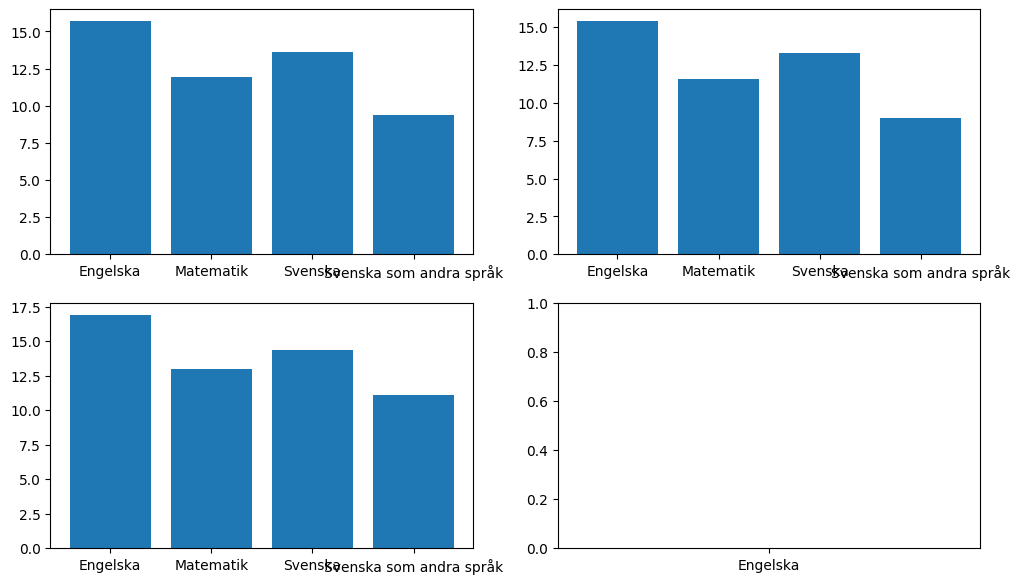

In [373]:
subject_names = ["Engelska", "Matematik", "Svenska", "Svenska som andra språk"]
huvudman_names = ["Samtliga", "Kommunal", "Enskild", "Skolverket"]

# sätter färg
colors = ['red', 'blue', 'green', 'orange']

# Plot stacked bar charts for each huvudman in subplots
fig, axes = plt.subplots(nrows=2, ncols=2,  figsize=(12, 7))

# axes.set_xticklabels(axes.get_xticklabels(), rotation = 90)

axes[0,0].bar(x = subject_names, height = total_poäng_0)
axes[0,1].bar(x = subject_names, height = total_poäng_1)
axes[1,0].bar(x = subject_names, height = total_poäng_2)
axes[1,1].bar(x = subject_names, height = total_poäng_3)

axes[0,0].set_title("samtliga",fontsize = 10)
axes[0,1].set_title("Kommunal",fontsize = 10)
axes[1,0].set_title("Enskild", fontsize = 10)
axes[1,1].set_title("Skolverket", fontsize = 10)






# Add labels and title
fig.suptitle("Total Points for Each Subject and Huvudman")
plt.tight_layout()

# Show the plot
plt.show()

# Uppgift 1 - uppvärmning betyg och prov
### 
I uppgifterna nedan ska du använda dig av datasetet betyg_o_prov_riksnivå.xlsx. Använd Plotly för att rita diagrammen
nedan för de uppgifter som kräver diagram. Använd Pandas för att svara på frågor om datasetet.
  
a) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt,
flickor och pojkar i samma graf.
